<a href="https://colab.research.google.com/github/charlesaurav13/DeepLearning/blob/main/HandwrittenDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using **CNN**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import datasets,layers,models
import matplotlib.pyplot as plt

In [ ]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

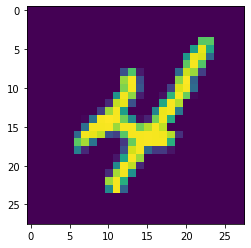

In [ ]:
plt.imshow(x_train[9])

Scaling the data

In [ ]:
x_train = x_train/255

In [ ]:
x_train

Making a Convolutional Neural Network with specifying the padding and a dense neural network with filters as 6 and 10 in another then making a neurons with 20 percentage dropout at the end

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=6,padding='same',kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=10,padding='same',kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(100,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(200,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10,activation='softmax')
])

selecting the optimizer to be adam and loss as ,
it simply means how t=we udaet the daat and how to handle the loss and get the optimal value for the weights and the bias

In [ ]:
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

**Starting to train the model with the data**

In [ ]:
cnn.fit(x_train,y_train,epochs=100,batch_size=20000)

Epoch 1/100
3/3 [==============================] - 27s 8s/step - loss: 2.2908 - accuracy: 0.1305
Epoch 2/100
3/3 [==============================] - 24s 8s/step - loss: 2.2485 - accuracy: 0.2223
Epoch 3/100
3/3 [==============================] - 23s 8s/step - loss: 2.1835 - accuracy: 0.2996
Epoch 4/100
3/3 [==============================] - 22s 8s/step - loss: 2.0816 - accuracy: 0.3608
Epoch 5/100
3/3 [==============================] - 24s 8s/step - loss: 1.9341 - accuracy: 0.4414
Epoch 6/100
3/3 [==============================] - 23s 8s/step - loss: 1.7305 - accuracy: 0.5064
Epoch 7/100
3/3 [==============================] - 24s 8s/step - loss: 1.4898 - accuracy: 0.5515
Epoch 8/100
3/3 [==============================] - 23s 8s/step - loss: 1.2659 - accuracy: 0.5908
Epoch 9/100
3/3 [==============================] - 22s 8s/step - loss: 1.0778 - accuracy: 0.6378
Epoch 10/100
3/3 [==============================] - 24s 8s/step - loss: 0.9281 - accuracy: 0.6857
Epoch 11/100
3/3 [===========

In [ ]:
x_test = x_test/255

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0357 - accuracy: 0.9883


[0.035710182040929794, 0.9883000254631042]

In [ ]:
predict = cnn.predict(x_test)
predict_labels = [np.argmax(i) for i in predict]

313/313 [==============================] - 3s 10ms/step


In [ ]:
cm = tf.math.confusion_matrix(labels=y_test,predictions = predict_labels)

Text(69.0, 0.5, 'Truth')

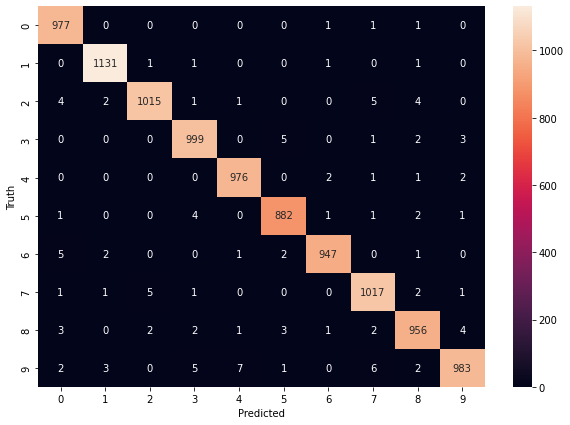

In [ ]:
import seaborn as sn
plt.figure(figsize =(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
predict_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

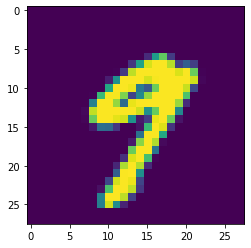

In [ ]:
plt.imshow(x_test[20])

In [ ]:
predict_labels[20]

9

In [ ]:
from sklearn.metrics import classification_report
print("Classification_Reprot: \n",classification_report(y_test,predict_labels))

Classification_Reprot: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
import pickle
pickle.dump(cnn, open('mnist_cnn.pkl', 'wb'))